In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [21]:
class point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return f'({self.x},{self.y})'
    
class segment:
    def __init__(self, x1, y1, x2, y2):
        self.p1 = point(x1,y1)
        self.p2 = point(x2,y2)
    
    def __repr__(self):
        return f'{self.p1} -> {self.p2}'
    
    def to_array(self):
        return [[self.p1.x,self.p1.y], [self.p2.x,self.p2.y]]
    
    def middle(self, y_new):
        alpha = (y_new - self.p2.y)/(self.p1.y - self.p2.y)
        x_new = alpha*self.p1.x+(1-alpha)*self.p2.x
        return [x_new, y_new]
        

In [43]:
class Node:
    def __init__(self, val, lc = None, rc = None):
        self.val = val
        self.lc = lc
        self.rc = rc
        
def insert(root, new):
    if root is None:
        return Node(new)
    elif less_line(new, root.val):
        root.lc = insert(root.lc, new)
    else:
        root.rc = insert(root.rc, new)
    return root

def inorder(root):
    result = [] 
    if root:
        result.extend(inorder(root.lc))
        result.append(root.val)
        result.extend(inorder(root.rc))
    return result

def preorder(root):
    result = [] 
    if root:
        result.append((root.val))
        result.extend(inorder(root.lc))
        result.extend(inorder(root.rc))
    return result

def depth(root):
    if root is None:
        return 0
    return max(depth(root.lc), depth(root.rc)) + 1

def is_balanced(root):
    if root is None:
        return True
    left = depth(root.lc)
    right = depth(root.rc)
    if abs(left - right) < 2 and is_balanced(root.lc) and is_balanced(root.rc):
        return True
    return False

def BBT(x):
    if len(x) == 0:
        return None
    mid = len(x) >> 1
    newRoot = Node(x[mid])
    newRoot.lc = BBT(x[:mid])
    newRoot.rc = BBT(x[mid+1:])
    return newRoot

def less_line(p0, p1):
    if p0.y > p1.y:
        return True
    elif p0.y == p1.y and p0.x < p1.x:
        return True
    else:
        return False

In [44]:
x = np.random.rand(10,2)
x = x[np.lexsort([x[:,0],-x[:,1]])]

ini = [x]

r = BBT(x)
inorder(r)

[array([0.40646371, 0.90502129]),
 array([0.74751578, 0.63042323]),
 array([0.99824817, 0.44958456]),
 array([0.68596793, 0.40572196]),
 array([0.61464234, 0.32606614]),
 array([0.69615422, 0.30929703]),
 array([0.19012   , 0.18110812]),
 array([0.75011284, 0.17714414]),
 array([0.63482976, 0.09682124]),
 array([0.90412112, 0.01664135])]

In [45]:
def to_segments(x):
    mid = len(x) >> 1
    ini = x[:mid]
    fin = x[mid:]
    return ini, fin

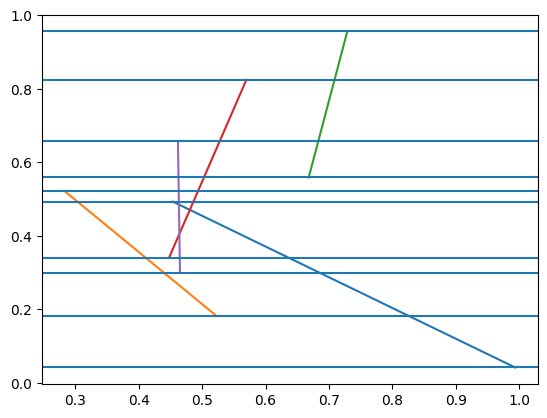

In [46]:
x = np.random.rand(10,2)
ini, fin = to_segments(x)
for i in range(len(ini)):
    plt.plot([ini[i,0], fin[i,0]], [ini[i,1], fin[i,1]])
    
x_ord = x[np.lexsort([x[:,0],-x[:,1]])]
for i in x_ord[:,1]:
    plt.axhline(i)

In [53]:
class sweeper:
    def __init__(self, x):
        self.segs = x
        self.intersections = []
        
        self.ini = []
        self.fin = []
        x_ord = []
        for i in range(len(x)):
            arr = x[i].to_array()
            x_ord.extend(arr)
            self.ini.append([arr[0], self.segs[i]])
            self.fin.append([arr[1], self.segs[i]])
            #self.ini[tuple(arr[0])] = self.segs[i]
            #self.fin[tuple(arr[1])] = self.segs[i]
        x_ord = np.array(x_ord)
        x_ord = x_ord[np.lexsort([x_ord[:,0],-x_ord[:,1]])]
        self.events = x_ord.tolist()
        self.tau = None
        self.line = None
        
    def inter(self, view = True):
        while len(self.events):
            change = True
            aux = self.line
            self.line = self.events.pop()
            self.manipulate_p()
            if view == True:
                if aux:
                    if aux[1] == self.line[1]:
                        change = False
                self.plot(change)
                
    def manipulate_p(self):
        epsilon = (max([p[0][1] for p in self.ini]) - min([p[0][1] for p in self.fin]))/10000000
        
        U_p = [[p[1].middle(self.line[1]+epsilon),p[1]] for p in self.ini if p[0] == self.line]
        L_p = [p for p in self.fin if p[0] == self.line]
        C_p = [[p[1].middle(self.line[1]+epsilon), p[1]] for p in inorder(self.tau) if p[1].middle(self.line[1]) == self.line]
        #{tuple(self.line): seg for (p,seg) in inorder(self.tau) if seg.middle(self.line[1]) == self.line}
        if len(U_p)+len(L_p)+len(C_p) > 1:
            self.intersections.append([self.line,U_p.values(), L_p.values(), C_p.values()])

        temp = U_p
        temp.extend(C_p)
        temp = sorted(temp, key=lambda pair: (-pair[0][1], pair[0][0]))
        self.tau = BBT(temp)
        print(inorder(self.tau))
        
        if len(U_p)+len(C_p) == 0:
            #self.find_event()
    
    def plot(self, change=True):
        for p, seg in self.ini:
            plt.plot([seg.p1.x, seg.p2.x], [seg.p1.y, seg.p2.y])
        if self.line and change:
            plt.axhline(self.line[1])

        

IndentationError: expected an indented block after 'if' statement on line 50 (1291648884.py, line 53)

[]
[[[0.5916629069109516, 0.090036109491099], (0.5916629483253281,0.09003602227485497) -> (0.20194621408501434,0.910756570727044)]]
[[[0.8841139060182484, 0.10303767137111], (0.884113978928518,0.10303758415486597) -> (0.510622759373722,0.549812798299122)]]
[]
[]
[[[0.7010737976300226, 0.5765204208372605], (0.7010739628739023,0.5765203336210165) -> (0.19747838928643024,0.842319675220665)]]
[[[0.900853673798845, 0.7815725487214025], (0.9008535960698518,0.7815724615051585) -> (0.208711811148373,0.004950966363406639)]]
[]
[[[0.6911773366532898, 0.8771134939445078], (0.6911772701777754,0.8771134067282638) -> (0.1339231408081567,0.14599289572229812)]]
[]


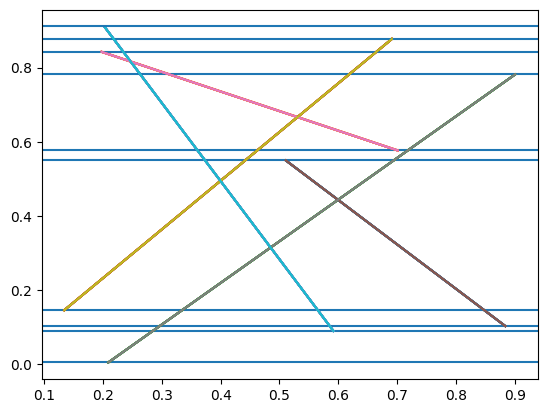

In [54]:
x = np.random.rand(10,2)
ini, fin = to_segments(x)
segmentos = []
for i in range(len(ini)):
    segmentos.append(segment(ini[i][0], ini[i][1], fin[i][0], fin[i][1]))
linea = sweeper(segmentos)
linea.inter()
#linea = sweeper(x)
#linea.sweep()
#linea.plot()